<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/DecisionTreeScikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [21]:
df=pd.read_csv('Q1Data.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [22]:
encoder= LabelEncoder()
df['Family']=encoder.fit_transform(df['Family'])
df['Genus']=encoder.fit_transform(df['Genus'])
df['Species']=encoder.fit_transform(df['Species'])
print(df)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_15  MFCCs_16  MF

In [23]:
scaler=StandardScaler()

In [25]:
X_data=df.iloc[:,0:22].join(df.iloc[:,23:])
print(X_data)
X=X_data.values
X=scaler.fit_transform(X)
X.shape

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MF

(7195, 23)

In [26]:

y=df.iloc[:,-2].values
print(y)
y.shape

[0 0 0 ... 7 7 7]


(7195,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [53]:
# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []
max_depth_values = list(range(1, 16))

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


[Text(0.3, 0.9285714285714286, 'x[22] <= -0.414\ngini = 0.61\nsamples = 5756\nvalue = [3315, 447, 242, 1269, 217, 94, 55, 117]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 3315\nvalue = [3315, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'x[22] <= 0.504\ngini = 0.674\nsamples = 2441\nvalue = [0, 447, 242, 1269, 217, 94, 55, 117]'),
 Text(0.2, 0.6428571428571429, 'x[22] <= 0.045\ngini = 0.456\nsamples = 689\nvalue = [0, 447, 242, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 447\nvalue = [0, 447, 0, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0, 0, 0, 0, 0]'),
 Text(0.6, 0.6428571428571429, 'x[22] <= 1.422\ngini = 0.452\nsamples = 1752\nvalue = [0, 0, 0, 1269, 217, 94, 55, 117]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1269\nvalue = [0, 0, 0, 1269, 0, 0, 0, 0]'),
 Text(0.7, 0.5, 'x[22] <= 1.881\ngini = 0.689\nsamples = 483\nvalue = [0, 0, 0, 0, 217, 94, 55, 117]'),
 Text(0.6, 0.35714285714285715, 'gini = 0.0\nsamples

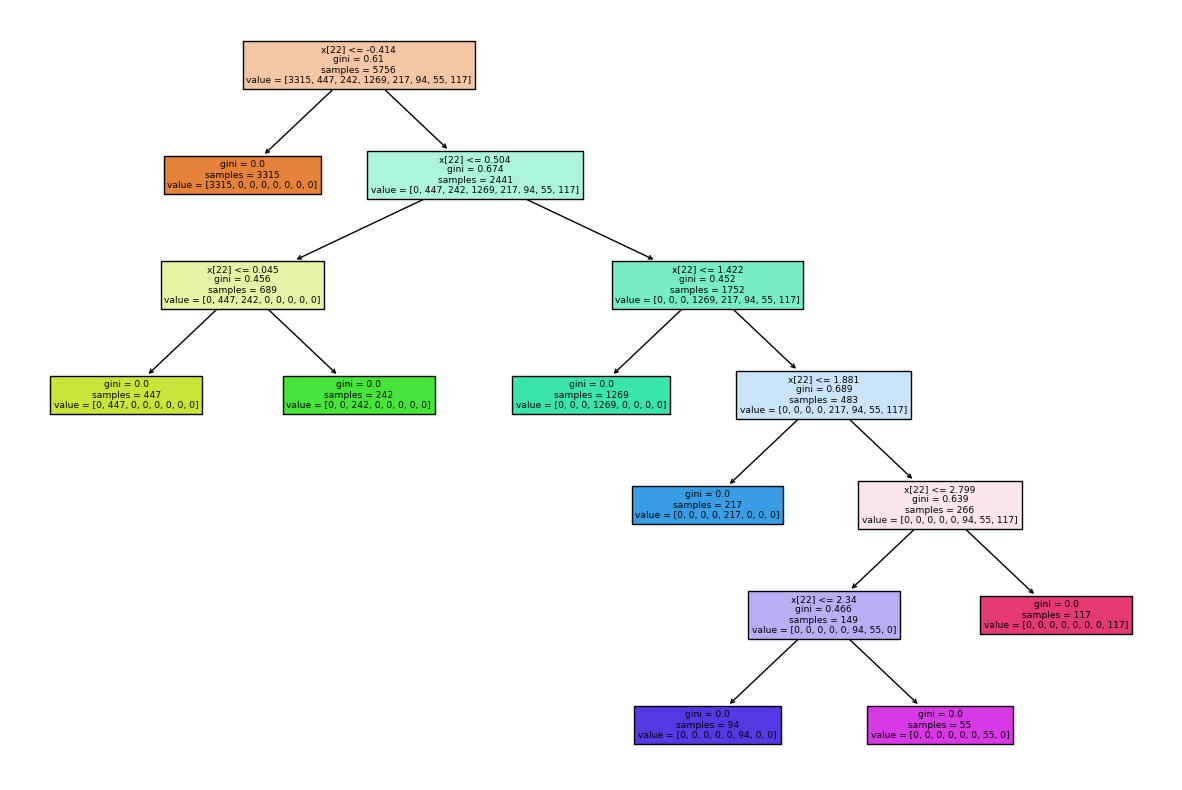

In [54]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

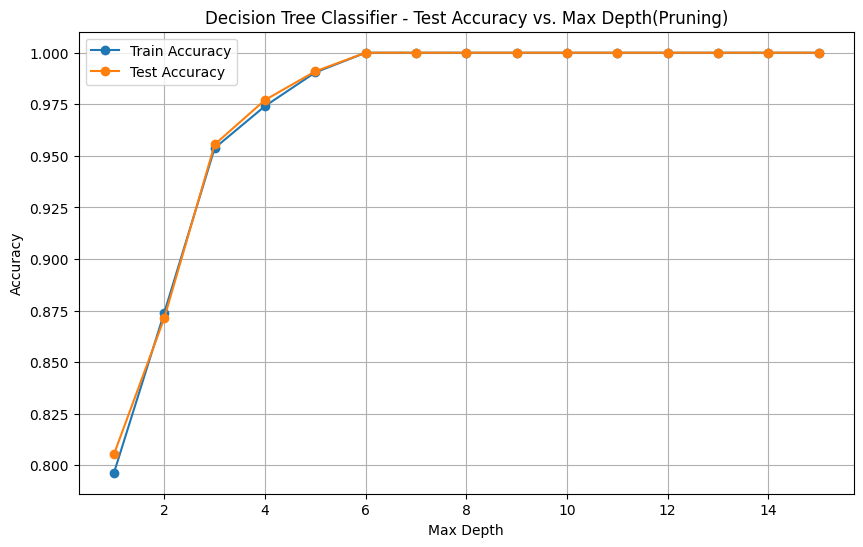

In [55]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier - Test Accuracy vs. Max Depth(Pruning)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:

mean_train_accuracy = np.mean(train_accuracy)
mean_test_accuracy = np.mean(test_accuracy)

print(f'Mean Train Accuracy: {mean_train_accuracy:.4f}')
print(f'Mean Test Accuracy: {mean_test_accuracy:.4f}')

Mean Train Accuracy: 0.9726
Mean Test Accuracy: 0.9734
